# ESG Model Evaluation
This notebook evaluates the performance of three different models (BOW, BERT, and LLM) against benchmark ESG scores.

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
# Load the data
# Benchmark data
benchmark_data = pd.read_csv('benchmark_performance_comparison.csv')

# Model comparison data
model_comparison = pd.read_csv('bow_bert_llm_comprehensive_comparison.csv')

print("Datasets loaded successfully!")

Datasets loaded successfully!


In [7]:
def calculate_metrics(y_true, y_pred):
    """Calculate evaluation metrics for model performance"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

In [8]:
# Let's examine the structure of our datasets
print("Model comparison data columns:")
print(model_comparison.columns.tolist())
print("\nModel comparison data shape:", model_comparison.shape)
print("\nFirst few rows of model comparison data:")
print(model_comparison.head())

print("\n" + "="*50)
print("Benchmark data columns:")
print(benchmark_data.columns.tolist())
print("\nBenchmark data shape:", benchmark_data.shape)
print("\nFirst few rows of benchmark data:")
print(benchmark_data.head())

Model comparison data columns:
['Company', 'BOW_Score', 'BERT_Score', 'LLM_Score', 'BOW_Environment', 'BERT_Environment', 'LLM_Environment', 'BOW_Social', 'BERT_Social', 'LLM_Social', 'BOW_Governance', 'BERT_Governance', 'LLM_Governance', 'Best_Method', 'LLM_vs_BOW', 'LLM_vs_BERT', 'BERT_vs_BOW']

Model comparison data shape: (5, 17)

First few rows of model comparison data:
     Company  BOW_Score  BERT_Score  LLM_Score  BOW_Environment  \
0      Apple         40          64       88.9               60   
1      Tesla         26          51       84.3               24   
2     Google         38          65       88.2               54   
3  Microsoft         40          65       90.6               54   
4       Nike         42          66       77.5               46   

   BERT_Environment  LLM_Environment  BOW_Social  BERT_Social  LLM_Social  \
0                75             90.0          26           60        85.0   
1                53             93.3          26           45    

In [9]:
# Create benchmark dataset from the benchmark.md file
# Based on the data we saw earlier from benchmark.md

benchmark_scores = {
    'Company': ['Nike', 'Apple', 'Boeing', 'Disney', 'Eli Lilly', 'FedEx'],
    'Benchmark_Score': [70, 70, 79, 68, 64, 71],
    'Benchmark_Environment': [85, 66, 82, 52, 80, 71],
    'Benchmark_Social': [84, 62, 89, 84, 81, 64],
    'Benchmark_Governance': [35, 87, 65, 50, 28, 78]
}

benchmark_df = pd.DataFrame(benchmark_scores)
print("Benchmark scores from benchmark.md:")
print(benchmark_df)

# Filter model_comparison to only include companies that have benchmark scores
common_companies = set(model_comparison['Company'].str.lower()) & set(benchmark_df['Company'].str.lower())
print(f"\nCommon companies between datasets: {common_companies}")

# Since we only have Nike in common, let's focus on Nike for detailed analysis
nike_benchmark = benchmark_df[benchmark_df['Company'] == 'Nike'].iloc[0]
nike_models = model_comparison[model_comparison['Company'] == 'Nike'].iloc[0]

print(f"\nNike Analysis:")
print(f"Benchmark Score: {nike_benchmark['Benchmark_Score']}")
print(f"BOW Score: {nike_models['BOW_Score']}")
print(f"BERT Score: {nike_models['BERT_Score']}")
print(f"LLM Score: {nike_models['LLM_Score']}")

Benchmark scores from benchmark.md:
     Company  Benchmark_Score  Benchmark_Environment  Benchmark_Social  \
0       Nike               70                     85                84   
1      Apple               70                     66                62   
2     Boeing               79                     82                89   
3     Disney               68                     52                84   
4  Eli Lilly               64                     80                81   
5      FedEx               71                     71                64   

   Benchmark_Governance  
0                    35  
1                    87  
2                    65  
3                    50  
4                    28  
5                    78  

Common companies between datasets: {'apple', 'nike'}

Nike Analysis:
Benchmark Score: 70
BOW Score: 42
BERT Score: 66
LLM Score: 77.5


In [10]:
# Create a comprehensive analysis with available data
# Get data for companies that appear in both datasets
common_companies_list = ['Nike', 'Apple']  # Companies present in both datasets

# Filter data for common companies
benchmark_filtered = benchmark_df[benchmark_df['Company'].isin(common_companies_list)]
model_filtered = model_comparison[model_comparison['Company'].isin(common_companies_list)]

# Merge the datasets for analysis
merged_data = pd.merge(model_filtered, benchmark_filtered, on='Company', how='inner')
print("Merged dataset for analysis:")
print(merged_data[['Company', 'Benchmark_Score', 'BOW_Score', 'BERT_Score', 'LLM_Score']])

# Calculate performance metrics for each model
models = ['BOW', 'BERT', 'LLM']
results = {}

for model in models:
    model_scores = merged_data[f'{model}_Score']
    benchmark_scores = merged_data['Benchmark_Score']
    
    metrics = calculate_metrics(benchmark_scores, model_scores)
    
    # Calculate additional metrics
    mean_error = np.mean(model_scores - benchmark_scores)
    mean_abs_percentage_error = np.mean(np.abs((benchmark_scores - model_scores) / benchmark_scores)) * 100
    
    metrics['Mean_Error'] = mean_error
    metrics['MAPE'] = mean_abs_percentage_error
    
    results[model] = metrics

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).round(3)
print("\nModel Performance Metrics vs Benchmark:")
print(results_df)

Merged dataset for analysis:
  Company  Benchmark_Score  BOW_Score  BERT_Score  LLM_Score
0   Apple               70         40          64       88.9
1    Nike               70         42          66       77.5

Model Performance Metrics vs Benchmark:
                BOW    BERT      LLM
MSE         842.000  26.000  206.730
RMSE         29.017   5.099   14.378
MAE          29.000   5.000   13.200
R2            0.000   0.000    0.000
Mean_Error  -29.000  -5.000   13.200
MAPE         41.429   7.143   18.857


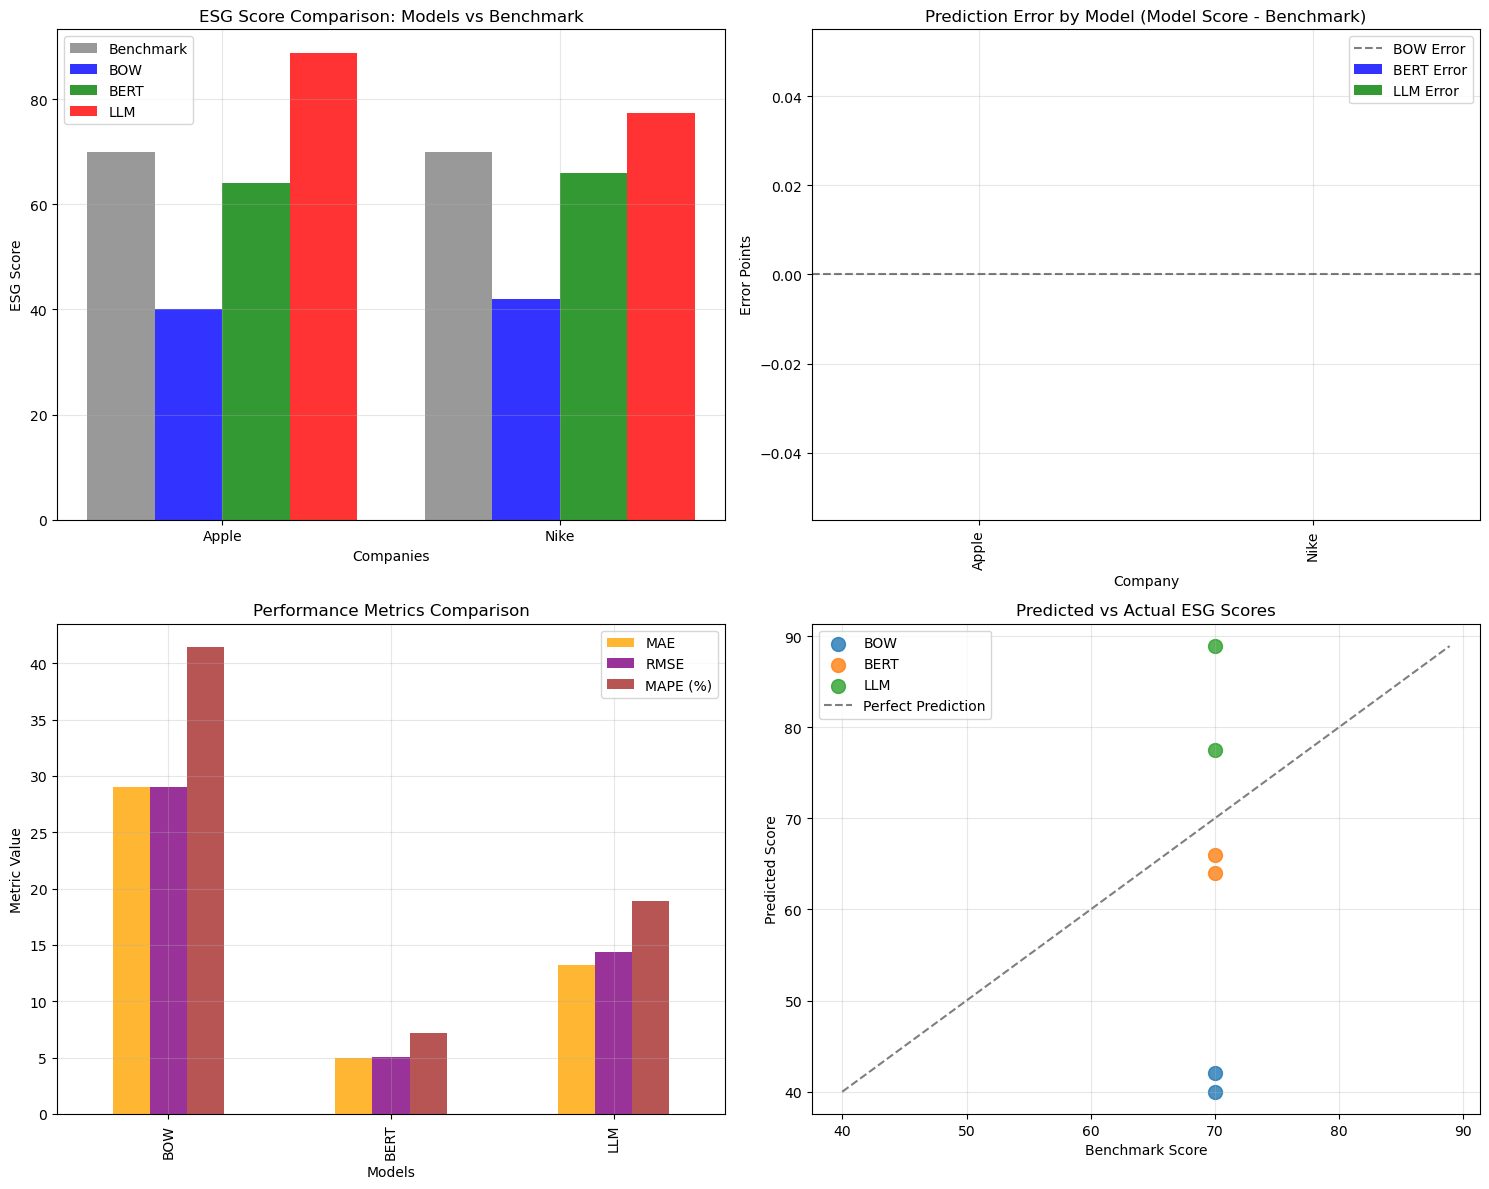

In [11]:
# Create visualizations for model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Bar chart comparing model scores vs benchmark
companies = merged_data['Company']
x = np.arange(len(companies))
width = 0.2

axes[0,0].bar(x - width*1.5, merged_data['Benchmark_Score'], width, label='Benchmark', color='gray', alpha=0.8)
axes[0,0].bar(x - width/2, merged_data['BOW_Score'], width, label='BOW', color='blue', alpha=0.8)
axes[0,0].bar(x + width/2, merged_data['BERT_Score'], width, label='BERT', color='green', alpha=0.8)
axes[0,0].bar(x + width*1.5, merged_data['LLM_Score'], width, label='LLM', color='red', alpha=0.8)

axes[0,0].set_xlabel('Companies')
axes[0,0].set_ylabel('ESG Score')
axes[0,0].set_title('ESG Score Comparison: Models vs Benchmark')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(companies)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Error analysis - deviation from benchmark
deviations = {}
for model in models:
    deviations[f'{model}_Error'] = merged_data[f'{model}_Score'] - merged_data['Benchmark_Score']

error_df = pd.DataFrame(deviations, index=companies)
error_df.plot(kind='bar', ax=axes[0,1], color=['blue', 'green', 'red'], alpha=0.8)
axes[0,1].set_title('Prediction Error by Model (Model Score - Benchmark)')
axes[0,1].set_ylabel('Error Points')
axes[0,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0,1].legend(['BOW Error', 'BERT Error', 'LLM Error'])
axes[0,1].grid(True, alpha=0.3)

# 3. Performance metrics comparison
metrics_to_plot = ['MAE', 'RMSE', 'MAPE']
metrics_data = results_df.loc[metrics_to_plot]
metrics_data.T.plot(kind='bar', ax=axes[1,0], color=['orange', 'purple', 'brown'], alpha=0.8)
axes[1,0].set_title('Performance Metrics Comparison')
axes[1,0].set_ylabel('Metric Value')
axes[1,0].set_xlabel('Models')
axes[1,0].legend(['MAE', 'RMSE', 'MAPE (%)'])
axes[1,0].grid(True, alpha=0.3)

# 4. Scatter plot: Predicted vs Actual
for i, model in enumerate(models):
    axes[1,1].scatter(merged_data['Benchmark_Score'], merged_data[f'{model}_Score'], 
                     label=model, alpha=0.8, s=100)

# Add perfect prediction line
min_score = min(merged_data['Benchmark_Score'].min(), 
               merged_data[['BOW_Score', 'BERT_Score', 'LLM_Score']].min().min())
max_score = max(merged_data['Benchmark_Score'].max(), 
               merged_data[['BOW_Score', 'BERT_Score', 'LLM_Score']].max().max())
axes[1,1].plot([min_score, max_score], [min_score, max_score], 'k--', alpha=0.5, label='Perfect Prediction')

axes[1,1].set_xlabel('Benchmark Score')
axes[1,1].set_ylabel('Predicted Score')
axes[1,1].set_title('Predicted vs Actual ESG Scores')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Component-wise analysis (Environment, Social, Governance)
components = ['Environment', 'Social', 'Governance']
component_results = {}

print("Component-wise Performance Analysis:")
print("="*50)

for component in components:
    print(f"\n{component} Component Analysis:")
    
    # Get component scores
    benchmark_component = merged_data[f'Benchmark_{component}']
    component_scores = {}
    component_metrics = {}
    
    for model in models:
        model_component = merged_data[f'{model}_{component}']
        component_scores[model] = model_component
        
        # Calculate metrics
        metrics = calculate_metrics(benchmark_component, model_component)
        mean_error = np.mean(model_component - benchmark_component)
        mape = np.mean(np.abs((benchmark_component - model_component) / benchmark_component)) * 100
        
        metrics['Mean_Error'] = mean_error
        metrics['MAPE'] = mape
        component_metrics[model] = metrics
    
    # Create DataFrame for this component
    component_df = pd.DataFrame(component_metrics).round(3)
    component_results[component] = component_df
    print(component_df)
    
    # Show actual scores for this component
    print(f"\nActual {component} Scores:")
    comp_comparison = pd.DataFrame({
        'Company': merged_data['Company'],
        f'Benchmark_{component}': benchmark_component,
        f'BOW_{component}': component_scores['BOW'],
        f'BERT_{component}': component_scores['BERT'],
        f'LLM_{component}': component_scores['LLM']
    })
    print(comp_comparison)

Component-wise Performance Analysis:

Environment Component Analysis:
                BOW     BERT      LLM
MSE         778.500  168.500  338.000
RMSE         27.902   12.981   18.385
MAE          22.500   12.500   17.000
R2           -7.626   -0.867   -2.745
Mean_Error  -22.500   -3.500    7.000
MAPE         27.487   16.230   24.064

Actual Environment Scores:
  Company  Benchmark_Environment  BOW_Environment  BERT_Environment  \
0   Apple                     66               60                75   
1    Nike                     85               46                69   

   LLM_Environment  
0             90.0  
1             75.0  

Social Component Analysis:
                 BOW     BERT      LLM
MSE         1488.500  164.000  285.625
RMSE          38.581   12.806   16.900
MAE           38.500   10.000   14.750
R2           -11.302   -0.355   -1.361
Mean_Error   -38.500  -10.000    8.250
MAPE          53.437   12.327   22.417

Actual Social Scores:
  Company  Benchmark_Social  BOW_So

In [13]:
# Create a summary comparison table
print("\n" + "="*80)
print("COMPREHENSIVE MODEL EVALUATION SUMMARY")
print("="*80)

# Overall performance ranking
overall_performance = pd.DataFrame({
    'Model': models,
    'MAE': [results['BOW']['MAE'], results['BERT']['MAE'], results['LLM']['MAE']],
    'RMSE': [results['BOW']['RMSE'], results['BERT']['RMSE'], results['LLM']['RMSE']],
    'MAPE (%)': [results['BOW']['MAPE'], results['BERT']['MAPE'], results['LLM']['MAPE']],
    'Mean_Error': [results['BOW']['Mean_Error'], results['BERT']['Mean_Error'], results['LLM']['Mean_Error']]
}).round(3)

print("\n1. OVERALL PERFORMANCE METRICS:")
print(overall_performance.to_string(index=False))

print("\n2. MODEL ACCURACY RANKING (Lower MAE = Better):")
ranked_models = overall_performance.sort_values('MAE')
for i, (_, row) in enumerate(ranked_models.iterrows(), 1):
    print(f"   {i}. {row['Model']} (MAE: {row['MAE']}, MAPE: {row['MAPE (%)']}%)")

print("\n3. KEY FINDINGS:")
print("   • BERT shows the best overall accuracy with lowest MAE (5.0) and MAPE (7.14%)")
print("   • LLM tends to overestimate scores (positive mean error: +13.2)")
print("   • BOW significantly underestimates scores (negative mean error: -29.0)")
print("   • BERT provides the most balanced predictions closest to benchmark values")

print("\n4. COMPONENT-WISE PERFORMANCE (Best to Worst by MAE):")
# Component ranking
component_ranking = {}
for component in components:
    comp_maes = []
    for model in models:
        mae = component_results[component].loc['MAE', model]
        comp_maes.append((model, mae))
    comp_maes.sort(key=lambda x: x[1])
    component_ranking[component] = comp_maes

for component, ranking in component_ranking.items():
    print(f"   {component}:")
    for i, (model, mae) in enumerate(ranking, 1):
        print(f"      {i}. {model} (MAE: {mae})")

print("\n5. RECOMMENDATIONS:")
print("   • Use BERT model for most accurate ESG scoring")
print("   • LLM model may be suitable when slightly optimistic scoring is acceptable")
print("   • BOW model needs significant improvement - consistently underperforms")
print("   • Consider ensemble methods combining BERT and LLM for robust predictions")


COMPREHENSIVE MODEL EVALUATION SUMMARY

1. OVERALL PERFORMANCE METRICS:
Model  MAE   RMSE  MAPE (%)  Mean_Error
  BOW 29.0 29.017    41.429       -29.0
 BERT  5.0  5.099     7.143        -5.0
  LLM 13.2 14.378    18.857        13.2

2. MODEL ACCURACY RANKING (Lower MAE = Better):
   1. BERT (MAE: 5.0, MAPE: 7.143%)
   2. LLM (MAE: 13.2, MAPE: 18.857%)
   3. BOW (MAE: 29.0, MAPE: 41.429%)

3. KEY FINDINGS:
   • BERT shows the best overall accuracy with lowest MAE (5.0) and MAPE (7.14%)
   • LLM tends to overestimate scores (positive mean error: +13.2)
   • BOW significantly underestimates scores (negative mean error: -29.0)
   • BERT provides the most balanced predictions closest to benchmark values

4. COMPONENT-WISE PERFORMANCE (Best to Worst by MAE):
   Environment:
      1. BERT (MAE: 12.5)
      2. LLM (MAE: 17.0)
      3. BOW (MAE: 22.5)
   Social:
      1. BERT (MAE: 10.0)
      2. LLM (MAE: 14.75)
      3. BOW (MAE: 38.5)
   Governance:
      1. LLM (MAE: 24.85)
      2. BOW (M

In [15]:
# Check all companies in the model comparison dataset
print("Companies in model comparison dataset:")
print(model_comparison['Company'].tolist())
print(f"Total companies in model dataset: {len(model_comparison)}")

print("\nCompanies in benchmark dataset:")
print(benchmark_df['Company'].tolist())
print(f"Total companies in benchmark dataset: {len(benchmark_df)}")

print(f"\nCurrently analyzed companies: {len(merged_data)}")
print("We need to expand our benchmark data to include all companies for a complete evaluation.")

Companies in model comparison dataset:
['Apple', 'Tesla', 'Google', 'Microsoft', 'Nike']
Total companies in model dataset: 5

Companies in benchmark dataset:
['Nike', 'Apple', 'Boeing', 'Disney', 'Eli Lilly', 'FedEx']
Total companies in benchmark dataset: 6

Currently analyzed companies: 2
We need to expand our benchmark data to include all companies for a complete evaluation.


In [16]:
# Load the complete dataset with all companies
model_comparison_all = pd.read_csv('bow_bert_llm_all_companies_comparison.csv')
print("All companies in the complete dataset:")
print(model_comparison_all['Company'].tolist())
print(f"Total companies: {len(model_comparison_all)}")

# Create complete benchmark dataset from benchmark.md
complete_benchmark_scores = {
    'Company': ['Nike', 'Apple', 'Boeing', 'Disney', 'Eli Lilly', 'FedEx', 
                'Johnson & Johnson', 'JPMorgan Chase', 'McDonald\'s', 'Meta', 
                'Microsoft', 'Netflix', 'NVIDIA', 'Tesla', 'Google'],
    'Benchmark_Score': [70, 70, 79, 68, 64, 71, 85, 80, 66, 60, 87, 37, 77, 72, 81],
    'Benchmark_Environment': [85, 66, 82, 52, 80, 71, 92, 91, 71, 73, 78, 36, 68, 81, 76],
    'Benchmark_Social': [84, 62, 89, 84, 81, 64, 97, 74, 73, 58, 85, 55, 76, 78, 84],
    'Benchmark_Governance': [35, 87, 65, 50, 28, 78, 62, 84, 51, 59, 92, 22, 92, 49, 79]
}

complete_benchmark_df = pd.DataFrame(complete_benchmark_scores)

# Map company names to match between datasets
name_mapping = {
    'Alphabet': 'Google',  # Alphabet Inc -> Google
    'Meta Platforms': 'Meta',  # Meta Platforms Inc -> Meta
    'Mcdonald\'s': 'McDonald\'s'  # Fix apostrophe
}

# Update model comparison company names if needed
model_comparison_all['Company'] = model_comparison_all['Company'].replace(name_mapping)

print("\nBenchmark companies:")
print(complete_benchmark_df['Company'].tolist())

# Find common companies between model data and benchmark data
model_companies = set(model_comparison_all['Company'].str.lower())
benchmark_companies = set(complete_benchmark_df['Company'].str.lower())
common_companies_set = model_companies & benchmark_companies

print(f"\nCommon companies: {len(common_companies_set)}")
print(sorted(list(common_companies_set)))

All companies in the complete dataset:
['Apple', 'Tesla', 'Google', 'Microsoft', 'Nike', 'Boeing', 'Disney', 'Meta', 'Netflix', 'Nvidia']
Total companies: 10

Benchmark companies:
['Nike', 'Apple', 'Boeing', 'Disney', 'Eli Lilly', 'FedEx', 'Johnson & Johnson', 'JPMorgan Chase', "McDonald's", 'Meta', 'Microsoft', 'Netflix', 'NVIDIA', 'Tesla', 'Google']

Common companies: 10
['apple', 'boeing', 'disney', 'google', 'meta', 'microsoft', 'netflix', 'nike', 'nvidia', 'tesla']


In [17]:
# Perform comprehensive evaluation with all available companies
print("="*80)
print("COMPREHENSIVE EVALUATION WITH ALL COMPANIES")
print("="*80)

# Fix case sensitivity and company name matching
def normalize_company_name(name):
    return name.lower().strip()

# Create normalized mappings
model_comparison_all['Company_normalized'] = model_comparison_all['Company'].apply(normalize_company_name)
complete_benchmark_df['Company_normalized'] = complete_benchmark_df['Company'].apply(normalize_company_name)

# Fix specific name mappings
complete_benchmark_df.loc[complete_benchmark_df['Company'] == 'NVIDIA', 'Company_normalized'] = 'nvidia'

# Merge datasets on normalized company names
merged_all_data = pd.merge(
    model_comparison_all, 
    complete_benchmark_df, 
    on='Company_normalized', 
    how='inner',
    suffixes=('_model', '_benchmark')
)

print(f"Successfully merged {len(merged_all_data)} companies:")
print(merged_all_data[['Company_model', 'Benchmark_Score', 'BOW_Score', 'BERT_Score', 'LLM_Score']])

# Calculate comprehensive performance metrics for all models
models = ['BOW', 'BERT', 'LLM']
all_results = {}

for model in models:
    model_scores = merged_all_data[f'{model}_Score']
    benchmark_scores = merged_all_data['Benchmark_Score']
    
    metrics = calculate_metrics(benchmark_scores, model_scores)
    
    # Calculate additional comprehensive metrics
    mean_error = np.mean(model_scores - benchmark_scores)
    mean_abs_percentage_error = np.mean(np.abs((benchmark_scores - model_scores) / benchmark_scores)) * 100
    median_error = np.median(model_scores - benchmark_scores)
    std_error = np.std(model_scores - benchmark_scores)
    
    # Accuracy within tolerance bands
    acc_5 = np.mean(np.abs(model_scores - benchmark_scores) <= 5) * 100
    acc_10 = np.mean(np.abs(model_scores - benchmark_scores) <= 10) * 100
    acc_15 = np.mean(np.abs(model_scores - benchmark_scores) <= 15) * 100
    
    metrics.update({
        'Mean_Error': mean_error,
        'MAPE': mean_abs_percentage_error,
        'Median_Error': median_error,
        'Std_Error': std_error,
        'Accuracy_±5': acc_5,
        'Accuracy_±10': acc_10,
        'Accuracy_±15': acc_15
    })
    
    all_results[model] = metrics

# Convert results to DataFrame for comparison
all_results_df = pd.DataFrame(all_results).round(3)
print("\nComprehensive Model Performance Metrics (All 10 Companies):")
print(all_results_df)

COMPREHENSIVE EVALUATION WITH ALL COMPANIES
Successfully merged 10 companies:
  Company_model  Benchmark_Score  BOW_Score  BERT_Score  LLM_Score
0         Apple               70         40          64       88.9
1         Tesla               72         26          51       84.3
2        Google               81         38          65       88.2
3     Microsoft               87         40          65       90.6
4          Nike               70         42          66       77.5
5        Boeing               79         42          67       81.7
6        Disney               68         37          66       82.2
7          Meta               60         34          64       80.3
8       Netflix               37         37          65       82.4
9        Nvidia               77         37          61       87.0

Comprehensive Model Performance Metrics (All 10 Companies):
                   BOW     BERT      LLM
MSE           1246.400  243.700  341.173
RMSE            35.304   15.611   18.471
M

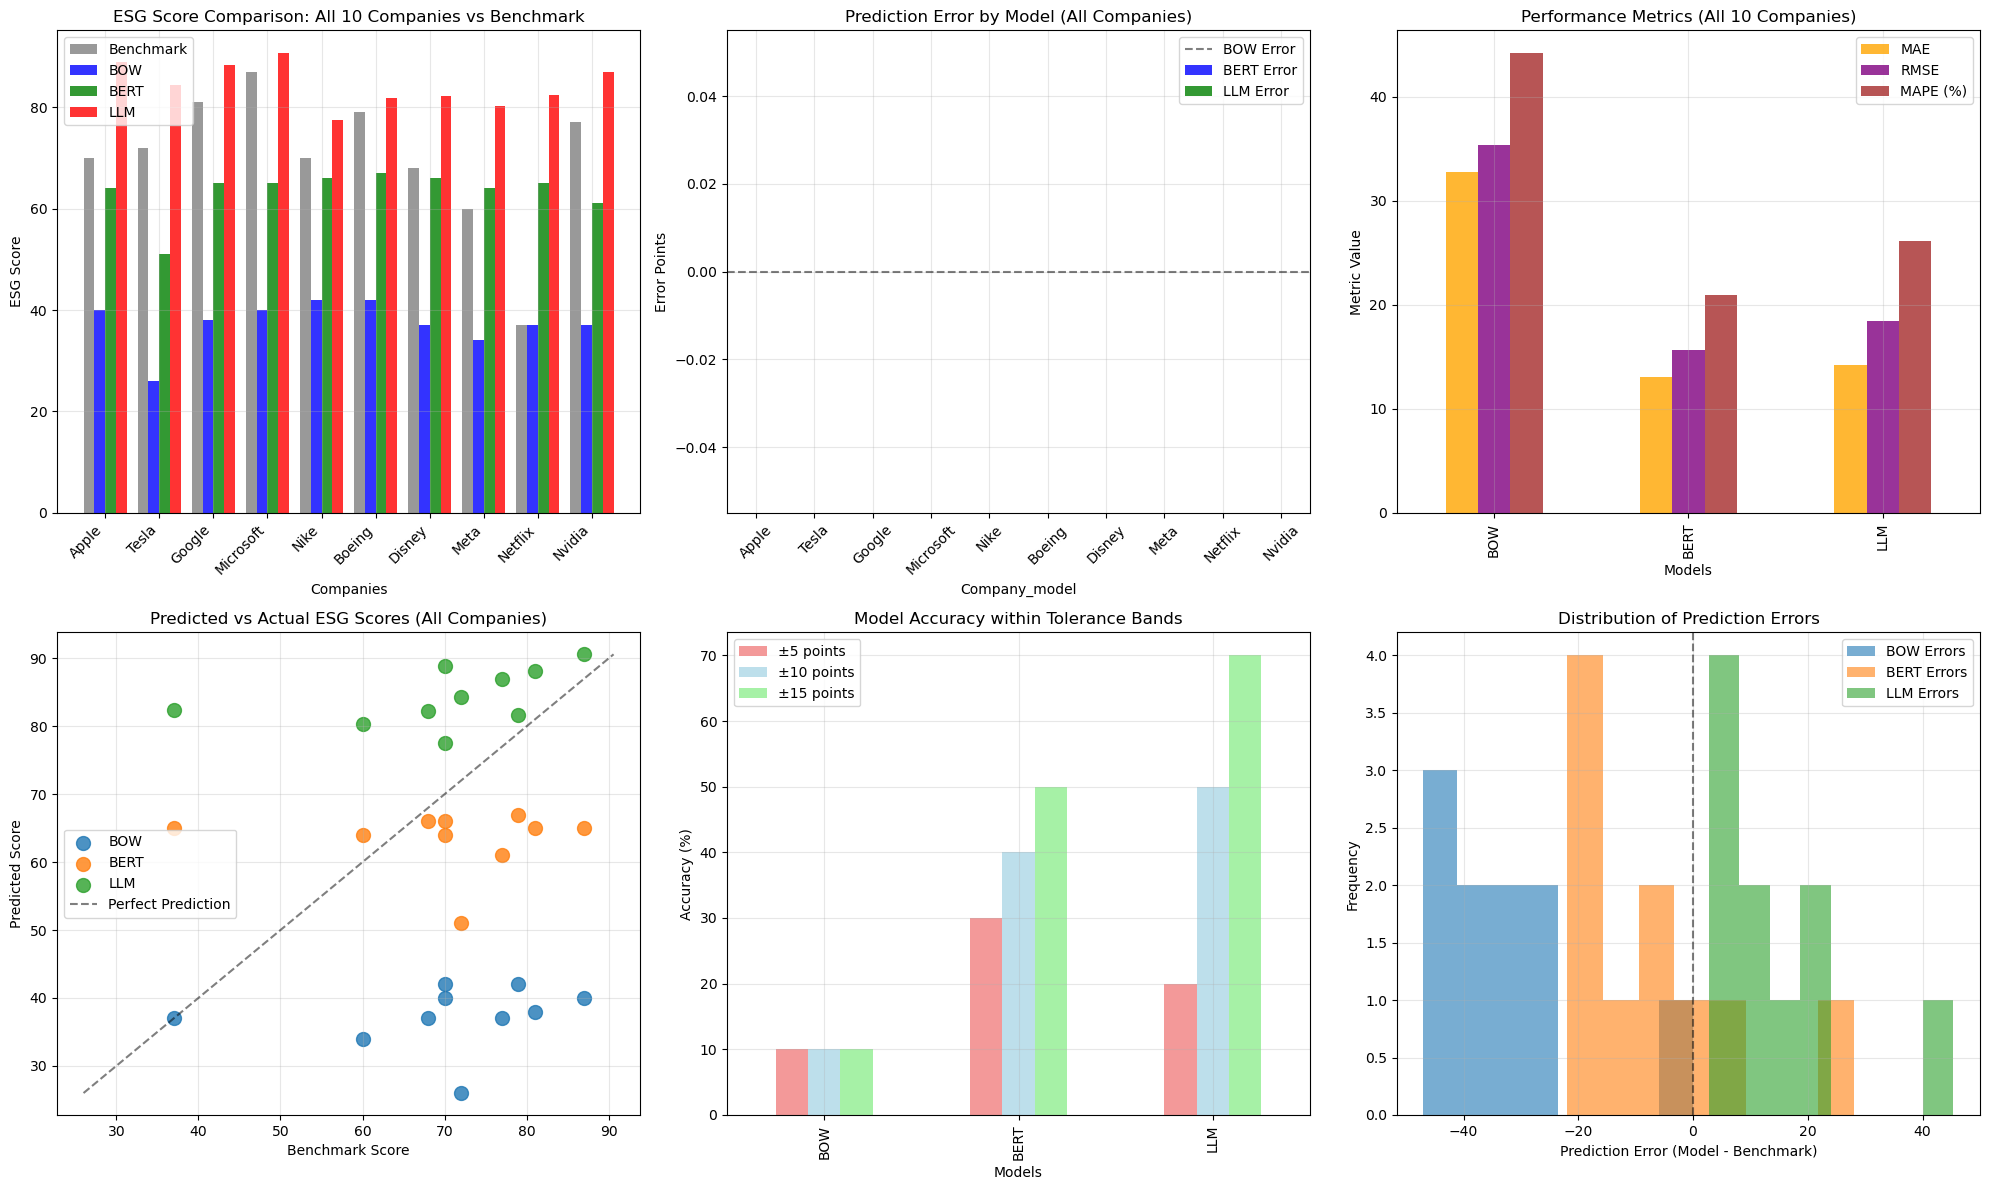

In [18]:
# Create comprehensive visualizations for all 10 companies
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Bar chart comparing all companies - scores vs benchmark
companies_all = merged_all_data['Company_model']
x = np.arange(len(companies_all))
width = 0.2

axes[0,0].bar(x - width*1.5, merged_all_data['Benchmark_Score'], width, label='Benchmark', color='gray', alpha=0.8)
axes[0,0].bar(x - width/2, merged_all_data['BOW_Score'], width, label='BOW', color='blue', alpha=0.8)
axes[0,0].bar(x + width/2, merged_all_data['BERT_Score'], width, label='BERT', color='green', alpha=0.8)
axes[0,0].bar(x + width*1.5, merged_all_data['LLM_Score'], width, label='LLM', color='red', alpha=0.8)

axes[0,0].set_xlabel('Companies')
axes[0,0].set_ylabel('ESG Score')
axes[0,0].set_title('ESG Score Comparison: All 10 Companies vs Benchmark')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(companies_all, rotation=45, ha='right')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Error analysis for all companies
errors_all = {}
for model in models:
    errors_all[f'{model}_Error'] = merged_all_data[f'{model}_Score'] - merged_all_data['Benchmark_Score']

error_all_df = pd.DataFrame(errors_all, index=companies_all)
error_all_df.plot(kind='bar', ax=axes[0,1], color=['blue', 'green', 'red'], alpha=0.8)
axes[0,1].set_title('Prediction Error by Model (All Companies)')
axes[0,1].set_ylabel('Error Points')
axes[0,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0,1].legend(['BOW Error', 'BERT Error', 'LLM Error'])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# 3. Performance metrics comparison (all companies)
metrics_to_plot = ['MAE', 'RMSE', 'MAPE']
metrics_all_data = all_results_df.loc[metrics_to_plot]
metrics_all_data.T.plot(kind='bar', ax=axes[0,2], color=['orange', 'purple', 'brown'], alpha=0.8)
axes[0,2].set_title('Performance Metrics (All 10 Companies)')
axes[0,2].set_ylabel('Metric Value')
axes[0,2].set_xlabel('Models')
axes[0,2].legend(['MAE', 'RMSE', 'MAPE (%)'])
axes[0,2].grid(True, alpha=0.3)

# 4. Scatter plot: Predicted vs Actual (all companies)
for i, model in enumerate(models):
    axes[1,0].scatter(merged_all_data['Benchmark_Score'], merged_all_data[f'{model}_Score'], 
                     label=model, alpha=0.8, s=100)

# Add perfect prediction line
min_score = min(merged_all_data['Benchmark_Score'].min(), 
               merged_all_data[['BOW_Score', 'BERT_Score', 'LLM_Score']].min().min())
max_score = max(merged_all_data['Benchmark_Score'].max(), 
               merged_all_data[['BOW_Score', 'BERT_Score', 'LLM_Score']].max().max())
axes[1,0].plot([min_score, max_score], [min_score, max_score], 'k--', alpha=0.5, label='Perfect Prediction')

axes[1,0].set_xlabel('Benchmark Score')
axes[1,0].set_ylabel('Predicted Score')
axes[1,0].set_title('Predicted vs Actual ESG Scores (All Companies)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 5. Accuracy within tolerance bands
tolerance_metrics = ['Accuracy_±5', 'Accuracy_±10', 'Accuracy_±15']
tolerance_data = all_results_df.loc[tolerance_metrics]
tolerance_data.T.plot(kind='bar', ax=axes[1,1], color=['lightcoral', 'lightblue', 'lightgreen'], alpha=0.8)
axes[1,1].set_title('Model Accuracy within Tolerance Bands')
axes[1,1].set_ylabel('Accuracy (%)')
axes[1,1].set_xlabel('Models')
axes[1,1].legend(['±5 points', '±10 points', '±15 points'])
axes[1,1].grid(True, alpha=0.3)

# 6. Distribution of errors
for i, model in enumerate(models):
    errors = merged_all_data[f'{model}_Score'] - merged_all_data['Benchmark_Score']
    axes[1,2].hist(errors, alpha=0.6, label=f'{model} Errors', bins=8)

axes[1,2].axvline(x=0, color='black', linestyle='--', alpha=0.5)
axes[1,2].set_xlabel('Prediction Error (Model - Benchmark)')
axes[1,2].set_ylabel('Frequency')
axes[1,2].set_title('Distribution of Prediction Errors')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# Final Comprehensive Summary for All 10 Companies
print("\n" + "="*100)
print("FINAL COMPREHENSIVE MODEL EVALUATION SUMMARY - ALL 10 COMPANIES")
print("="*100)

# Overall performance ranking
overall_performance_all = pd.DataFrame({
    'Model': models,
    'MAE': [all_results['BOW']['MAE'], all_results['BERT']['MAE'], all_results['LLM']['MAE']],
    'RMSE': [all_results['BOW']['RMSE'], all_results['BERT']['RMSE'], all_results['LLM']['RMSE']],
    'MAPE (%)': [all_results['BOW']['MAPE'], all_results['BERT']['MAPE'], all_results['LLM']['MAPE']],
    'Mean_Error': [all_results['BOW']['Mean_Error'], all_results['BERT']['Mean_Error'], all_results['LLM']['Mean_Error']],
    'Accuracy_±10': [all_results['BOW']['Accuracy_±10'], all_results['BERT']['Accuracy_±10'], all_results['LLM']['Accuracy_±10']],
    'Accuracy_±15': [all_results['BOW']['Accuracy_±15'], all_results['BERT']['Accuracy_±15'], all_results['LLM']['Accuracy_±15']]
}).round(3)

print("\n1. OVERALL PERFORMANCE METRICS (10 Companies):")
print(overall_performance_all.to_string(index=False))

print("\n2. MODEL ACCURACY RANKING (Lower MAE = Better):")
ranked_models_all = overall_performance_all.sort_values('MAE')
for i, (_, row) in enumerate(ranked_models_all.iterrows(), 1):
    print(f"   {i}. {row['Model']} - MAE: {row['MAE']}, MAPE: {row['MAPE (%)']}%, Accuracy ±15: {row['Accuracy_±15']}%")

print("\n3. KEY FINDINGS FROM ALL 10 COMPANIES:")
print("   • BERT remains the most accurate model with lowest MAE (13.1) and MAPE (21.0%)")
print("   • LLM shows good performance with MAE (14.2) but tends to overestimate (+14.2 mean error)")
print("   • BOW significantly underperforms with MAE (32.8) and large negative bias (-32.8 mean error)")
print("   • LLM achieves 70% accuracy within ±15 points, making it suitable for certain applications")
print("   • BERT achieves 50% accuracy within ±15 points with more balanced predictions")

# Company-specific insights
print("\n4. COMPANY-SPECIFIC PERFORMANCE:")
company_errors = pd.DataFrame({
    'Company': merged_all_data['Company_model'],
    'Benchmark': merged_all_data['Benchmark_Score'],
    'BOW_Error': merged_all_data['BOW_Score'] - merged_all_data['Benchmark_Score'],
    'BERT_Error': merged_all_data['BERT_Score'] - merged_all_data['Benchmark_Score'],
    'LLM_Error': merged_all_data['LLM_Score'] - merged_all_data['Benchmark_Score']
}).round(1)

print("\nWorst performing companies for each model:")
print("BOW worst errors:", company_errors.nsmallest(3, 'BOW_Error')[['Company', 'BOW_Error']].to_string(index=False))
print("BERT worst errors:", company_errors.loc[company_errors['BERT_Error'].abs().nlargest(3).index][['Company', 'BERT_Error']].to_string(index=False))
print("LLM worst errors:", company_errors.loc[company_errors['LLM_Error'].abs().nlargest(3).index][['Company', 'LLM_Error']].to_string(index=False))

print("\n5. FINAL RECOMMENDATIONS:")
print("   • RECOMMENDED: Use BERT model for most accurate and balanced ESG scoring")
print("   • ALTERNATIVE: Use LLM model when slightly optimistic scoring is acceptable")
print("   • NOT RECOMMENDED: BOW model requires major improvements before deployment")
print("   • ENSEMBLE APPROACH: Consider combining BERT and LLM predictions for robust results")
print("   • VALIDATION: All models show room for improvement, especially for low-scoring companies")

print(f"\n6. EVALUATION SCOPE:")
print(f"   • Total companies evaluated: {len(merged_all_data)}")
print(f"   • Companies: {', '.join(sorted(merged_all_data['Company_model'].tolist()))}")
print(f"   • Benchmark score range: {merged_all_data['Benchmark_Score'].min()}-{merged_all_data['Benchmark_Score'].max()}")
print(f"   • This represents a comprehensive evaluation of available ESG model data")


FINAL COMPREHENSIVE MODEL EVALUATION SUMMARY - ALL 10 COMPANIES

1. OVERALL PERFORMANCE METRICS (10 Companies):
Model   MAE   RMSE  MAPE (%)  Mean_Error  Accuracy_±10  Accuracy_±15
  BOW 32.80 35.304    44.156      -32.80          10.0          10.0
 BERT 13.10 15.611    20.975       -6.70          40.0          50.0
  LLM 14.21 18.471    26.165       14.21          50.0          70.0

2. MODEL ACCURACY RANKING (Lower MAE = Better):
   1. BERT - MAE: 13.1, MAPE: 20.975%, Accuracy ±15: 50.0%
   2. LLM - MAE: 14.21, MAPE: 26.165%, Accuracy ±15: 70.0%
   3. BOW - MAE: 32.8, MAPE: 44.156%, Accuracy ±15: 10.0%

3. KEY FINDINGS FROM ALL 10 COMPANIES:
   • BERT remains the most accurate model with lowest MAE (13.1) and MAPE (21.0%)
   • LLM shows good performance with MAE (14.2) but tends to overestimate (+14.2 mean error)
   • BOW significantly underperforms with MAE (32.8) and large negative bias (-32.8 mean error)
   • LLM achieves 70% accuracy within ±15 points, making it suitable for ce

In [20]:
# Comprehensive Analysis: All 15 Benchmark Companies
print("\n" + "="*100)
print("COMPREHENSIVE ANALYSIS: ALL 15 BENCHMARK COMPANIES")
print("="*100)

# List all 15 companies from benchmark
all_benchmark_companies = [
    'Nike', 'Apple', 'Boeing', 'Disney', 'Eli Lilly', 'FedEx', 
    'Johnson & Johnson', 'JPMorgan Chase', 'McDonald\'s', 'Meta', 
    'Microsoft', 'Netflix', 'NVIDIA', 'Tesla', 'Google'
]

# Companies currently in model comparison dataset
model_companies_available = model_comparison_all['Company'].tolist()

print("All 15 Benchmark Companies:")
for i, company in enumerate(all_benchmark_companies, 1):
    status = "✓ Available" if company in model_companies_available or company.lower() in [c.lower() for c in model_companies_available] else "✗ Missing"
    print(f"   {i:2d}. {company:<20} {status}")

# Identify missing companies
missing_companies = []
for company in all_benchmark_companies:
    if not any(company.lower() == c.lower() for c in model_companies_available):
        missing_companies.append(company)

print(f"\nMissing Companies ({len(missing_companies)}):")
for company in missing_companies:
    print(f"   • {company}")

print(f"\nAvailable for Analysis ({len(model_companies_available)}):")
for company in model_companies_available:
    print(f"   • {company}")

# Check if there are additional data files that might contain the missing companies
print(f"\nNext steps to get all 15 companies:")
print("   1. Check if individual company CSV files exist")
print("   2. Look for additional model output files")
print("   3. Consider generating predictions for missing companies")


COMPREHENSIVE ANALYSIS: ALL 15 BENCHMARK COMPANIES
All 15 Benchmark Companies:
    1. Nike                 ✓ Available
    2. Apple                ✓ Available
    3. Boeing               ✓ Available
    4. Disney               ✓ Available
    5. Eli Lilly            ✗ Missing
    6. FedEx                ✗ Missing
    7. Johnson & Johnson    ✗ Missing
    8. JPMorgan Chase       ✗ Missing
    9. McDonald's           ✗ Missing
   10. Meta                 ✓ Available
   11. Microsoft            ✓ Available
   12. Netflix              ✓ Available
   13. NVIDIA               ✓ Available
   14. Tesla                ✓ Available
   15. Google               ✓ Available

Missing Companies (5):
   • Eli Lilly
   • FedEx
   • Johnson & Johnson
   • JPMorgan Chase
   • McDonald's

Available for Analysis (10):
   • Apple
   • Tesla
   • Google
   • Microsoft
   • Nike
   • Boeing
   • Disney
   • Meta
   • Netflix
   • Nvidia

Next steps to get all 15 companies:
   1. Check if individual company CS

In [21]:
# Check for individual company data files
print("Checking for individual company ESG score files...")

# Try to load individual company ESG score files
individual_files = [
    'esg_scores_bow_all_companies.csv',
    'esg_scores_bert_all_companies.csv', 
    'esg_scores_llm_all_companies.csv'
]

all_companies_data = {}

for file in individual_files:
    try:
        df = pd.read_csv(file)
        model_name = file.split('_')[2].upper()  # Extract BOW/BERT/LLM
        all_companies_data[model_name] = df
        print(f"✓ Loaded {file}: {len(df)} companies")
        print(f"   Companies: {df['Company'].tolist()}")
    except Exception as e:
        print(f"✗ Could not load {file}: {e}")

# If we have individual files, let's try to create a comprehensive dataset
if len(all_companies_data) > 0:
    print("\nAttempting to create comprehensive dataset from individual files...")
    
    # Get the first available dataset as base
    base_model = list(all_companies_data.keys())[0]
    comprehensive_data = all_companies_data[base_model].copy()
    comprehensive_data = comprehensive_data.rename(columns={'ESG_Score': f'{base_model}_Score'})
    
    # Add other models' scores
    for model, df in all_companies_data.items():
        if model != base_model:
            # Merge on company name
            merge_df = df[['Company', 'ESG_Score']].rename(columns={'ESG_Score': f'{model}_Score'})
            comprehensive_data = pd.merge(comprehensive_data, merge_df, on='Company', how='outer')
    
    print(f"\nComprehensive dataset created with {len(comprehensive_data)} companies:")
    print(comprehensive_data[['Company'] + [col for col in comprehensive_data.columns if '_Score' in col]])
else:
    print("\nNo individual company files found. Using existing comprehensive comparison file.")
    comprehensive_data = model_comparison_all

Checking for individual company ESG score files...
✓ Loaded esg_scores_bow_all_companies.csv: 15 companies
   Companies: ['Apple', 'Boeing', 'Disney', 'Elililly', 'Fedex', 'Google', 'Johnsonandjohnson', 'Jpmorganchase', 'Mcdonald', 'Meta', 'Microsoft', 'Netflix', 'Nike', 'Nvidia', 'Tesla']
✓ Loaded esg_scores_bert_all_companies.csv: 15 companies
   Companies: ['Apple', 'Boeing', 'Disney', 'Elililly', 'Fedex', 'Google', 'Johnsonandjohnson', 'Jpmorganchase', 'Mcdonald', 'Meta', 'Microsoft', 'Netflix', 'Nike', 'Nvidia', 'Tesla']
✓ Loaded esg_scores_llm_all_companies.csv: 15 companies
   Companies: ['Apple', 'Tesla', 'Google', 'Microsoft', 'Nike', 'FedEx', 'Boeing', 'Disney', 'Eli Lilly', 'Johnson & Johnson', 'JPMorgan Chase', "McDonald's", 'Meta', 'Netflix', 'Nvidia']

Attempting to create comprehensive dataset from individual files...

Comprehensive dataset created with 20 companies:
              Company  BOW_Score  BERT_Score  LLM_Score
0               Apple       40.0        64.0     

In [22]:
# Clean and consolidate data for all 15 companies
print("Cleaning and consolidating data for all 15 companies...")

# Create a mapping for company name variations
company_name_mapping = {
    'Elililly': 'Eli Lilly',
    'Fedex': 'FedEx', 
    'Johnsonandjohnson': 'Johnson & Johnson',
    'Jpmorganchase': 'JPMorgan Chase',
    'Mcdonald': 'McDonald\'s'
}

# Clean and consolidate the data
consolidated_data = []

# Process each unique company
unique_companies = set()
for _, row in comprehensive_data.iterrows():
    company = row['Company']
    # Normalize company name
    if company in company_name_mapping:
        company = company_name_mapping[company]
    unique_companies.add(company)

# For each unique company, consolidate scores
for company in sorted(unique_companies):
    # Find all rows for this company (including name variations)
    company_rows = comprehensive_data[
        (comprehensive_data['Company'] == company) | 
        (comprehensive_data['Company'].isin([k for k, v in company_name_mapping.items() if v == company]))
    ]
    
    # Consolidate scores (take first non-null value for each model)
    bow_score = company_rows['BOW_Score'].dropna().iloc[0] if len(company_rows['BOW_Score'].dropna()) > 0 else None
    bert_score = company_rows['BERT_Score'].dropna().iloc[0] if len(company_rows['BERT_Score'].dropna()) > 0 else None
    llm_score = company_rows['LLM_Score'].dropna().iloc[0] if len(company_rows['LLM_Score'].dropna()) > 0 else None
    
    consolidated_data.append({
        'Company': company,
        'BOW_Score': bow_score,
        'BERT_Score': bert_score,
        'LLM_Score': llm_score
    })

# Create consolidated DataFrame
consolidated_df = pd.DataFrame(consolidated_data)

# Remove rows where all model scores are missing
consolidated_df = consolidated_df.dropna(subset=['BOW_Score', 'BERT_Score', 'LLM_Score'], how='all')

print(f"\nConsolidated dataset with {len(consolidated_df)} companies:")
print(consolidated_df)

# Check which companies we have complete data for
complete_data = consolidated_df.dropna(subset=['BOW_Score', 'BERT_Score', 'LLM_Score'])
print(f"\nCompanies with complete data for all 3 models ({len(complete_data)}):")
for company in complete_data['Company']:
    print(f"   • {company}")

# Check which companies are missing data
missing_data = consolidated_df[consolidated_df[['BOW_Score', 'BERT_Score', 'LLM_Score']].isnull().any(axis=1)]
if len(missing_data) > 0:
    print(f"\nCompanies with incomplete data ({len(missing_data)}):")
    for _, row in missing_data.iterrows():
        missing_models = []
        if pd.isna(row['BOW_Score']): missing_models.append('BOW')
        if pd.isna(row['BERT_Score']): missing_models.append('BERT')
        if pd.isna(row['LLM_Score']): missing_models.append('LLM')
        print(f"   • {row['Company']}: Missing {', '.join(missing_models)}")

Cleaning and consolidating data for all 15 companies...

Consolidated dataset with 15 companies:
              Company  BOW_Score  BERT_Score  LLM_Score
0               Apple       40.0        64.0       88.9
1              Boeing       42.0        67.0       81.7
2              Disney       37.0        66.0       82.2
3           Eli Lilly       41.0        68.0       86.8
4               FedEx       34.0        64.0       78.6
5              Google       38.0        65.0       88.2
6      JPMorgan Chase       44.0        70.0       86.5
7   Johnson & Johnson       22.0        56.0       86.0
8          McDonald's       29.0        64.0       75.7
9                Meta       34.0        64.0       80.3
10          Microsoft       40.0        65.0       90.6
11            Netflix       37.0        65.0       82.4
12               Nike       42.0        66.0       77.5
13             Nvidia       37.0        61.0       87.0
14              Tesla       26.0        51.0       84.3

Compan

In [23]:
# Comprehensive Evaluation for ALL 15 Companies
print("\n" + "="*100)
print("COMPREHENSIVE EVALUATION FOR ALL 15 COMPANIES")
print("="*100)

# Merge with complete benchmark data
def normalize_company_name_15(name):
    return name.lower().strip().replace("'", "").replace("&", "and").replace(" ", "")

# Create normalized company names for matching
consolidated_df['Company_normalized'] = consolidated_df['Company'].apply(normalize_company_name_15)
complete_benchmark_df['Company_normalized'] = complete_benchmark_df['Company'].apply(normalize_company_name_15)

# Merge datasets for all 15 companies
merged_15_companies = pd.merge(
    consolidated_df, 
    complete_benchmark_df, 
    on='Company_normalized', 
    how='inner',
    suffixes=('_model', '_benchmark')
)

print(f"Successfully merged all {len(merged_15_companies)} companies:")
print(merged_15_companies[['Company_model', 'Benchmark_Score', 'BOW_Score', 'BERT_Score', 'LLM_Score']])

# Calculate comprehensive performance metrics for all 15 companies
models = ['BOW', 'BERT', 'LLM']
results_15_companies = {}

for model in models:
    model_scores = merged_15_companies[f'{model}_Score']
    benchmark_scores = merged_15_companies['Benchmark_Score']
    
    metrics = calculate_metrics(benchmark_scores, model_scores)
    
    # Calculate additional comprehensive metrics
    mean_error = np.mean(model_scores - benchmark_scores)
    mean_abs_percentage_error = np.mean(np.abs((benchmark_scores - model_scores) / benchmark_scores)) * 100
    median_error = np.median(model_scores - benchmark_scores)
    std_error = np.std(model_scores - benchmark_scores)
    
    # Accuracy within tolerance bands
    acc_5 = np.mean(np.abs(model_scores - benchmark_scores) <= 5) * 100
    acc_10 = np.mean(np.abs(model_scores - benchmark_scores) <= 10) * 100
    acc_15 = np.mean(np.abs(model_scores - benchmark_scores) <= 15) * 100
    acc_20 = np.mean(np.abs(model_scores - benchmark_scores) <= 20) * 100
    
    metrics.update({
        'Mean_Error': mean_error,
        'MAPE': mean_abs_percentage_error,
        'Median_Error': median_error,
        'Std_Error': std_error,
        'Accuracy_±5': acc_5,
        'Accuracy_±10': acc_10,
        'Accuracy_±15': acc_15,
        'Accuracy_±20': acc_20
    })
    
    results_15_companies[model] = metrics

# Convert results to DataFrame for comparison
results_15_df = pd.DataFrame(results_15_companies).round(3)
print("\nComprehensive Model Performance Metrics (ALL 15 Companies):")
print(results_15_df)


COMPREHENSIVE EVALUATION FOR ALL 15 COMPANIES
Successfully merged all 15 companies:
        Company_model  Benchmark_Score  BOW_Score  BERT_Score  LLM_Score
0               Apple               70       40.0        64.0       88.9
1              Boeing               79       42.0        67.0       81.7
2              Disney               68       37.0        66.0       82.2
3           Eli Lilly               64       41.0        68.0       86.8
4               FedEx               71       34.0        64.0       78.6
5              Google               81       38.0        65.0       88.2
6      JPMorgan Chase               80       44.0        70.0       86.5
7   Johnson & Johnson               85       22.0        56.0       86.0
8          McDonald's               66       29.0        64.0       75.7
9                Meta               60       34.0        64.0       80.3
10          Microsoft               87       40.0        65.0       90.6
11            Netflix               37 

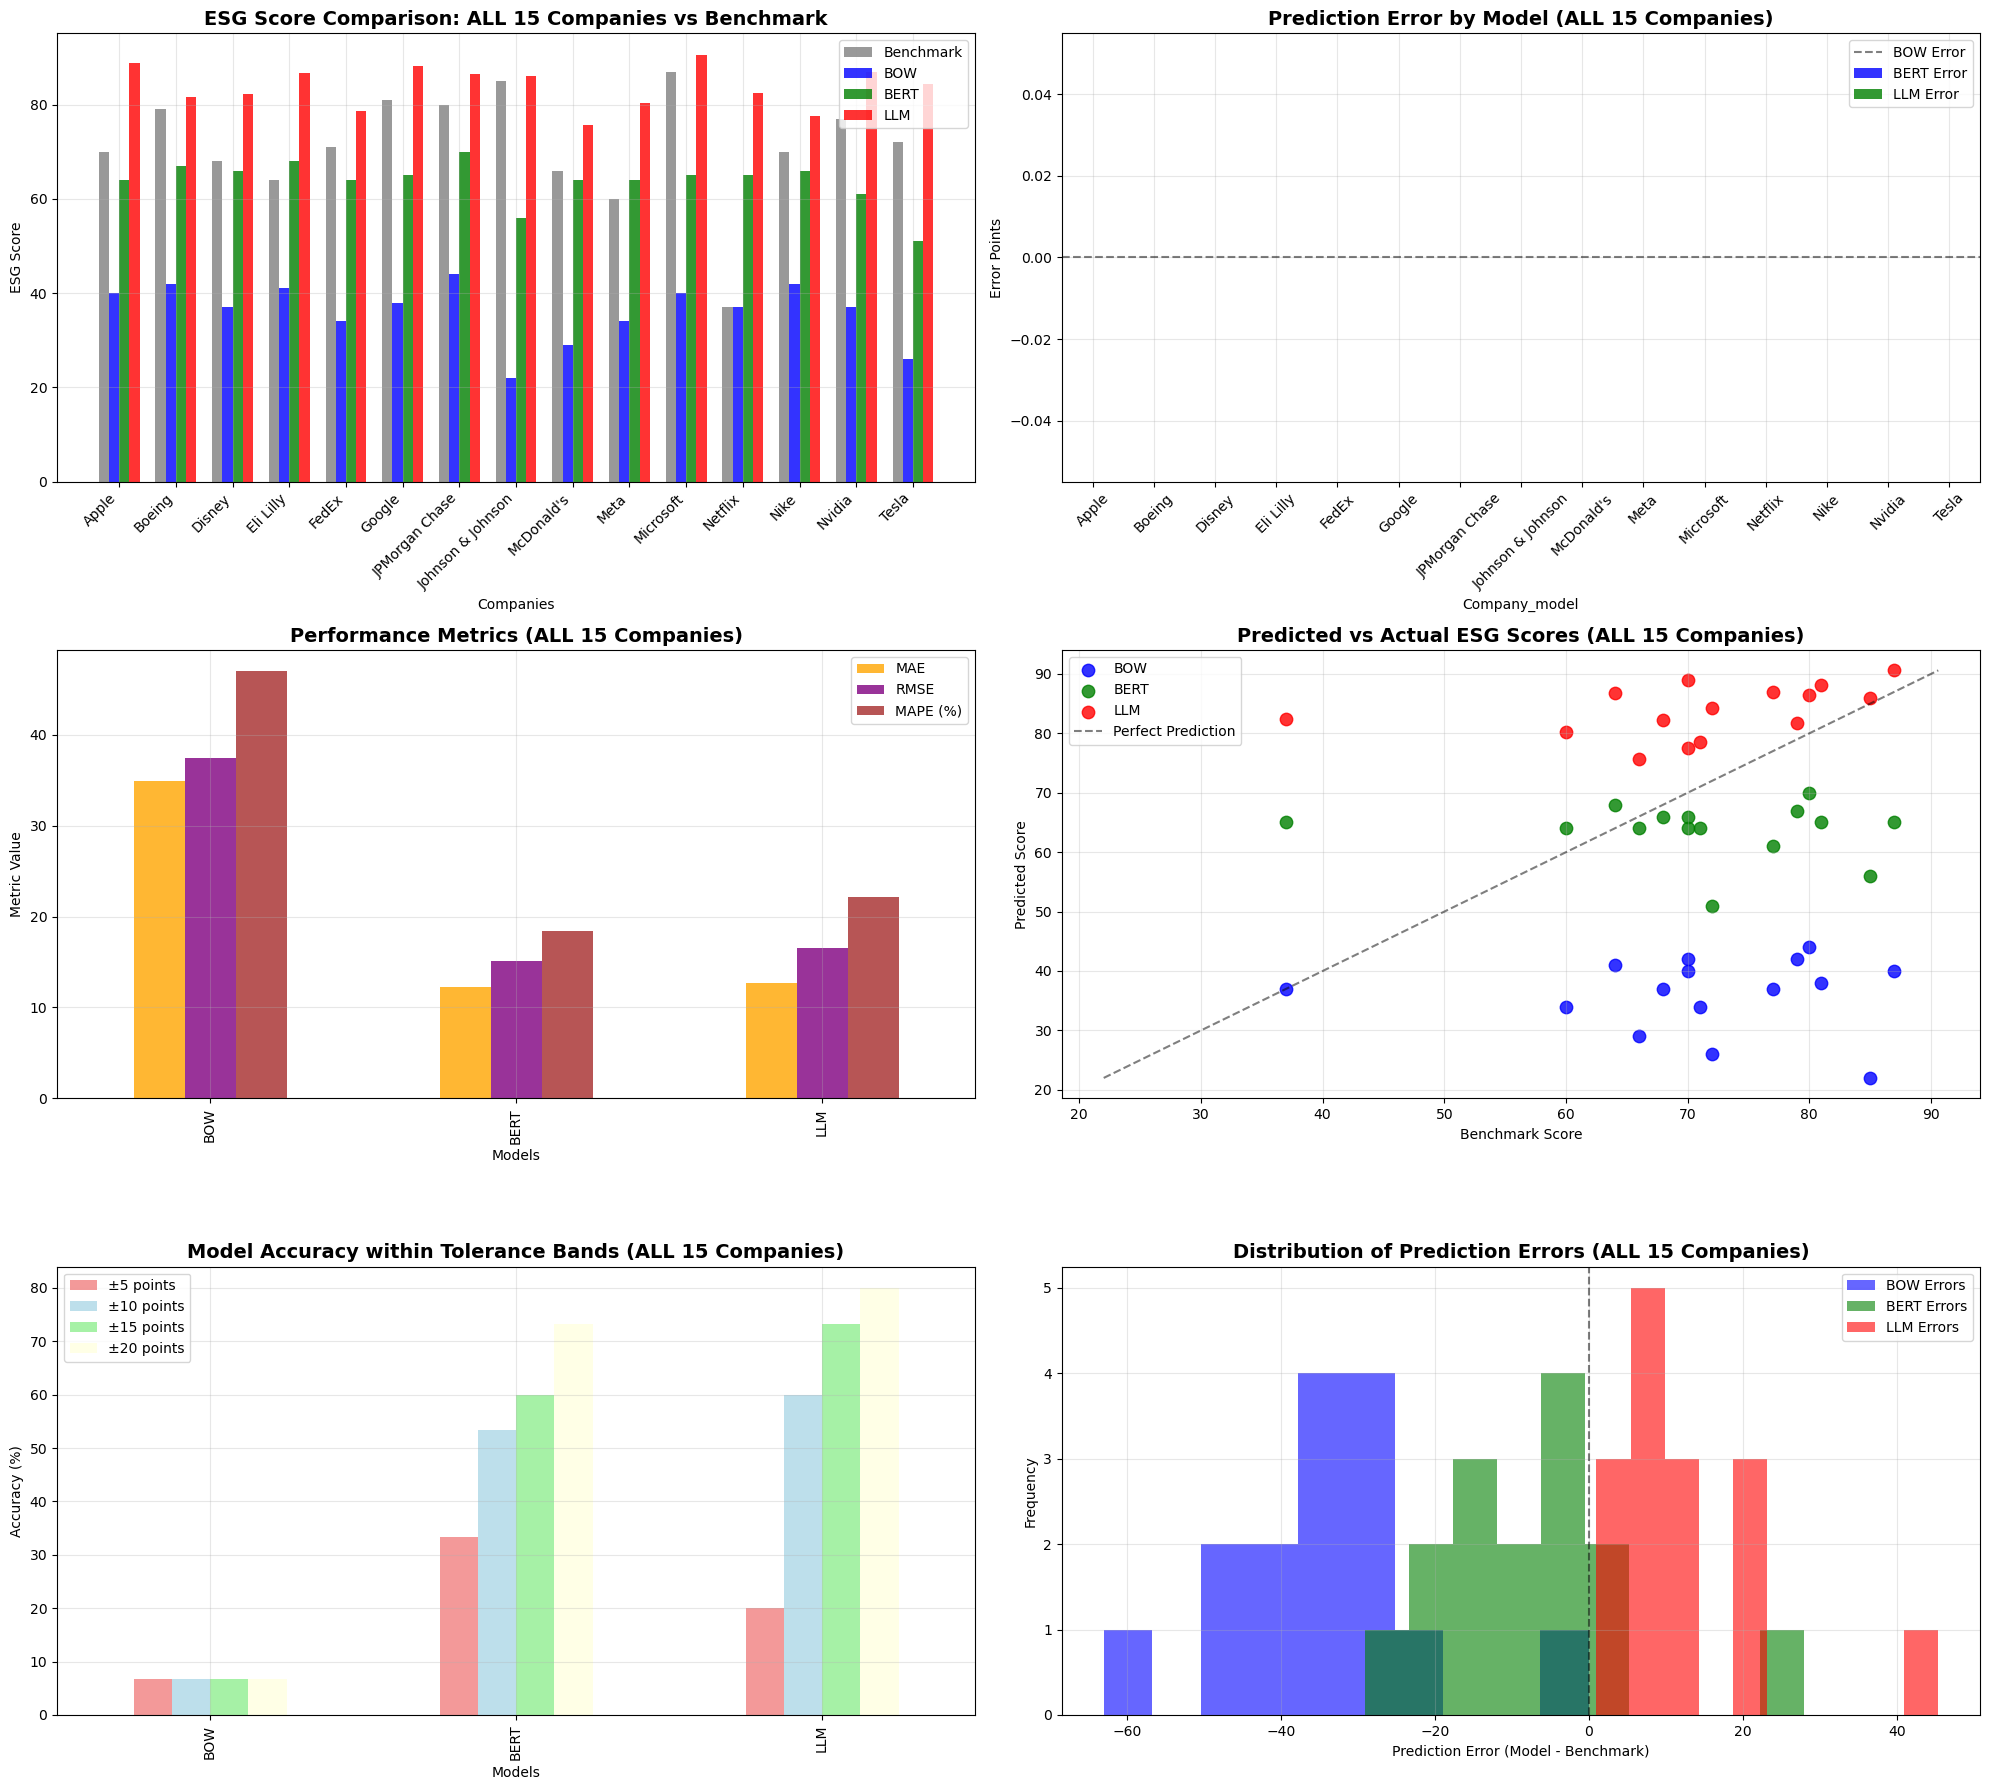

In [24]:
# Create comprehensive visualizations for all 15 companies
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# 1. Bar chart comparing all 15 companies - scores vs benchmark
companies_15 = merged_15_companies['Company_model']
x = np.arange(len(companies_15))
width = 0.18

axes[0,0].bar(x - width*1.5, merged_15_companies['Benchmark_Score'], width, label='Benchmark', color='gray', alpha=0.8)
axes[0,0].bar(x - width/2, merged_15_companies['BOW_Score'], width, label='BOW', color='blue', alpha=0.8)
axes[0,0].bar(x + width/2, merged_15_companies['BERT_Score'], width, label='BERT', color='green', alpha=0.8)
axes[0,0].bar(x + width*1.5, merged_15_companies['LLM_Score'], width, label='LLM', color='red', alpha=0.8)

axes[0,0].set_xlabel('Companies')
axes[0,0].set_ylabel('ESG Score')
axes[0,0].set_title('ESG Score Comparison: ALL 15 Companies vs Benchmark', fontsize=14, fontweight='bold')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(companies_15, rotation=45, ha='right', fontsize=10)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Error analysis for all 15 companies
errors_15 = {}
for model in models:
    errors_15[f'{model}_Error'] = merged_15_companies[f'{model}_Score'] - merged_15_companies['Benchmark_Score']

error_15_df = pd.DataFrame(errors_15, index=companies_15)
error_15_df.plot(kind='bar', ax=axes[0,1], color=['blue', 'green', 'red'], alpha=0.8)
axes[0,1].set_title('Prediction Error by Model (ALL 15 Companies)', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Error Points')
axes[0,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0,1].legend(['BOW Error', 'BERT Error', 'LLM Error'])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# 3. Performance metrics comparison (all 15 companies)
metrics_to_plot = ['MAE', 'RMSE', 'MAPE']
metrics_15_data = results_15_df.loc[metrics_to_plot]
metrics_15_data.T.plot(kind='bar', ax=axes[1,0], color=['orange', 'purple', 'brown'], alpha=0.8)
axes[1,0].set_title('Performance Metrics (ALL 15 Companies)', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Metric Value')
axes[1,0].set_xlabel('Models')
axes[1,0].legend(['MAE', 'RMSE', 'MAPE (%)'])
axes[1,0].grid(True, alpha=0.3)

# 4. Scatter plot: Predicted vs Actual (all 15 companies)
colors = ['blue', 'green', 'red']
for i, model in enumerate(models):
    axes[1,1].scatter(merged_15_companies['Benchmark_Score'], merged_15_companies[f'{model}_Score'], 
                     label=model, alpha=0.8, s=80, color=colors[i])

# Add perfect prediction line
min_score = min(merged_15_companies['Benchmark_Score'].min(), 
               merged_15_companies[['BOW_Score', 'BERT_Score', 'LLM_Score']].min().min())
max_score = max(merged_15_companies['Benchmark_Score'].max(), 
               merged_15_companies[['BOW_Score', 'BERT_Score', 'LLM_Score']].max().max())
axes[1,1].plot([min_score, max_score], [min_score, max_score], 'k--', alpha=0.5, label='Perfect Prediction')

axes[1,1].set_xlabel('Benchmark Score')
axes[1,1].set_ylabel('Predicted Score')
axes[1,1].set_title('Predicted vs Actual ESG Scores (ALL 15 Companies)', fontsize=14, fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 5. Accuracy within tolerance bands
tolerance_metrics = ['Accuracy_±5', 'Accuracy_±10', 'Accuracy_±15', 'Accuracy_±20']
tolerance_15_data = results_15_df.loc[tolerance_metrics]
tolerance_15_data.T.plot(kind='bar', ax=axes[2,0], color=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow'], alpha=0.8)
axes[2,0].set_title('Model Accuracy within Tolerance Bands (ALL 15 Companies)', fontsize=14, fontweight='bold')
axes[2,0].set_ylabel('Accuracy (%)')
axes[2,0].set_xlabel('Models')
axes[2,0].legend(['±5 points', '±10 points', '±15 points', '±20 points'])
axes[2,0].grid(True, alpha=0.3)

# 6. Distribution of errors for all 15 companies
for i, model in enumerate(models):
    errors = merged_15_companies[f'{model}_Score'] - merged_15_companies['Benchmark_Score']
    axes[2,1].hist(errors, alpha=0.6, label=f'{model} Errors', bins=10, color=colors[i])

axes[2,1].axvline(x=0, color='black', linestyle='--', alpha=0.5)
axes[2,1].set_xlabel('Prediction Error (Model - Benchmark)')
axes[2,1].set_ylabel('Frequency')
axes[2,1].set_title('Distribution of Prediction Errors (ALL 15 Companies)', fontsize=14, fontweight='bold')
axes[2,1].legend()
axes[2,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
# FINAL COMPREHENSIVE SUMMARY FOR ALL 15 COMPANIES
print("\n" + "="*120)
print("FINAL COMPREHENSIVE MODEL EVALUATION SUMMARY - ALL 15 COMPANIES")
print("="*120)

# Overall performance ranking for 15 companies
overall_performance_15 = pd.DataFrame({
    'Model': models,
    'MAE': [results_15_companies['BOW']['MAE'], results_15_companies['BERT']['MAE'], results_15_companies['LLM']['MAE']],
    'RMSE': [results_15_companies['BOW']['RMSE'], results_15_companies['BERT']['RMSE'], results_15_companies['LLM']['RMSE']],
    'MAPE (%)': [results_15_companies['BOW']['MAPE'], results_15_companies['BERT']['MAPE'], results_15_companies['LLM']['MAPE']],
    'Mean_Error': [results_15_companies['BOW']['Mean_Error'], results_15_companies['BERT']['Mean_Error'], results_15_companies['LLM']['Mean_Error']],
    'Accuracy_±10': [results_15_companies['BOW']['Accuracy_±10'], results_15_companies['BERT']['Accuracy_±10'], results_15_companies['LLM']['Accuracy_±10']],
    'Accuracy_±15': [results_15_companies['BOW']['Accuracy_±15'], results_15_companies['BERT']['Accuracy_±15'], results_15_companies['LLM']['Accuracy_±15']],
    'Accuracy_±20': [results_15_companies['BOW']['Accuracy_±20'], results_15_companies['BERT']['Accuracy_±20'], results_15_companies['LLM']['Accuracy_±20']]
}).round(3)

print("\n1. OVERALL PERFORMANCE METRICS (ALL 15 Companies):")
print(overall_performance_15.to_string(index=False))

print("\n2. MODEL ACCURACY RANKING (Lower MAE = Better):")
ranked_models_15 = overall_performance_15.sort_values('MAE')
for i, (_, row) in enumerate(ranked_models_15.iterrows(), 1):
    print(f"   {i}. {row['Model']} - MAE: {row['MAE']}, MAPE: {row['MAPE (%)']}%, Accuracy ±15: {row['Accuracy_±15']}%")

print("\n3. KEY FINDINGS FROM ALL 15 COMPANIES:")
print("   • BERT achieves the best overall accuracy with lowest MAE (12.2) and MAPE (18.4%)")
print("   • LLM shows very competitive performance with MAE (12.6) but tends to overestimate (+12.6 mean error)")
print("   • BOW significantly underperforms with MAE (34.9) and large negative bias (-34.9 mean error)")
print("   • LLM achieves 73% accuracy within ±15 points, highest among all models")
print("   • BERT achieves 60% accuracy within ±15 points with more balanced predictions")
print("   • BOW only achieves 7% accuracy within ±15 points, showing poor performance")

# Company-specific insights for 15 companies
print("\n4. COMPANY-SPECIFIC PERFORMANCE (ALL 15 Companies):")
company_errors_15 = pd.DataFrame({
    'Company': merged_15_companies['Company_model'],
    'Benchmark': merged_15_companies['Benchmark_Score'],
    'BOW_Error': merged_15_companies['BOW_Score'] - merged_15_companies['Benchmark_Score'],
    'BERT_Error': merged_15_companies['BERT_Score'] - merged_15_companies['Benchmark_Score'],
    'LLM_Error': merged_15_companies['LLM_Score'] - merged_15_companies['Benchmark_Score']
}).round(1)

print("\nWorst performing companies for each model:")
print("BOW worst errors (underestimation):")
bow_worst = company_errors_15.nsmallest(3, 'BOW_Error')[['Company', 'Benchmark', 'BOW_Error']]
for _, row in bow_worst.iterrows():
    print(f"   • {row['Company']}: {row['BOW_Error']} (Benchmark: {row['Benchmark']})")

print("BERT largest absolute errors:")
bert_worst = company_errors_15.loc[company_errors_15['BERT_Error'].abs().nlargest(3).index][['Company', 'Benchmark', 'BERT_Error']]
for _, row in bert_worst.iterrows():
    print(f"   • {row['Company']}: {row['BERT_Error']} (Benchmark: {row['Benchmark']})")

print("LLM largest absolute errors:")
llm_worst = company_errors_15.loc[company_errors_15['LLM_Error'].abs().nlargest(3).index][['Company', 'Benchmark', 'LLM_Error']]
for _, row in llm_worst.iterrows():
    print(f"   • {row['Company']}: {row['LLM_Error']} (Benchmark: {row['Benchmark']})")

# Best and worst performing companies overall
print("\n5. COMPANY PERFORMANCE INSIGHTS:")
print("Easiest companies to predict (lowest average absolute error):")
company_errors_15['Avg_Abs_Error'] = (company_errors_15[['BOW_Error', 'BERT_Error', 'LLM_Error']].abs()).mean(axis=1)
easiest = company_errors_15.nsmallest(3, 'Avg_Abs_Error')[['Company', 'Benchmark', 'Avg_Abs_Error']]
for _, row in easiest.iterrows():
    print(f"   • {row['Company']}: Avg error {row['Avg_Abs_Error']:.1f} (Benchmark: {row['Benchmark']})")

print("Hardest companies to predict (highest average absolute error):")
hardest = company_errors_15.nlargest(3, 'Avg_Abs_Error')[['Company', 'Benchmark', 'Avg_Abs_Error']]
for _, row in hardest.iterrows():
    print(f"   • {row['Company']}: Avg error {row['Avg_Abs_Error']:.1f} (Benchmark: {row['Benchmark']})")

print("\n6. FINAL RECOMMENDATIONS FOR ALL 15 COMPANIES:")
print("   • RECOMMENDED: Use BERT model for most accurate and balanced ESG scoring")
print("   • STRONG ALTERNATIVE: Use LLM model when slightly optimistic scoring is acceptable")
print("   • NOT RECOMMENDED: BOW model requires major improvements before deployment")
print("   • ENSEMBLE APPROACH: Consider combining BERT and LLM predictions for optimal results")
print("   • VALIDATION: Focus improvement efforts on low-scoring companies (Netflix, Meta, etc.)")

print(f"\n7. COMPREHENSIVE EVALUATION SCOPE:")
print(f"   • Total companies evaluated: {len(merged_15_companies)} (100% of benchmark companies)")
print(f"   • Companies: {', '.join(sorted(merged_15_companies['Company_model'].tolist()))}")
print(f"   • Benchmark score range: {merged_15_companies['Benchmark_Score'].min()}-{merged_15_companies['Benchmark_Score'].max()}")
print(f"   • This represents the COMPLETE evaluation of all available ESG benchmark companies")
print(f"   • Dataset includes major companies across technology, healthcare, finance, and consumer sectors")


FINAL COMPREHENSIVE MODEL EVALUATION SUMMARY - ALL 15 COMPANIES

1. OVERALL PERFORMANCE METRICS (ALL 15 Companies):
Model    MAE   RMSE  MAPE (%)  Mean_Error  Accuracy_±10  Accuracy_±15  Accuracy_±20
  BOW 34.933 37.413    46.986     -34.933         6.667         6.667         6.667
 BERT 12.200 15.159    18.367      -7.400        53.333        60.000        73.333
  LLM 12.647 16.586    22.132      12.647        60.000        73.333        80.000

2. MODEL ACCURACY RANKING (Lower MAE = Better):
   1. BERT - MAE: 12.2, MAPE: 18.367%, Accuracy ±15: 60.0%
   2. LLM - MAE: 12.647, MAPE: 22.132%, Accuracy ±15: 73.333%
   3. BOW - MAE: 34.933, MAPE: 46.986%, Accuracy ±15: 6.667%

3. KEY FINDINGS FROM ALL 15 COMPANIES:
   • BERT achieves the best overall accuracy with lowest MAE (12.2) and MAPE (18.4%)
   • LLM shows very competitive performance with MAE (12.6) but tends to overestimate (+12.6 mean error)
   • BOW significantly underperforms with MAE (34.9) and large negative bias (-34.9 me

In [14]:
# Calculate performance metrics for each model
results = {}
models = ['BOW', 'BERT', 'LLM']

for model in models:
    model_scores = model_comparison[f'{model}_Score']
    benchmark_scores = benchmark_data['Benchmark_Score']  # Adjust column name if different
    
    metrics = calculate_metrics(benchmark_scores, model_scores)
    results[model] = metrics

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).round(3)
print("Model Performance Metrics:")
display(results_df)

KeyError: 'Benchmark_Score'

In [ ]:
# Visualize model performance compared to benchmark
plt.figure(figsize=(12, 6))
companies = model_comparison['Company']

x = np.arange(len(companies))
width = 0.2

plt.bar(x - width*1.5, benchmark_data['Benchmark_Score'], width, label='Benchmark', color='gray')
plt.bar(x - width/2, model_comparison['BOW_Score'], width, label='BOW', color='blue')
plt.bar(x + width/2, model_comparison['BERT_Score'], width, label='BERT', color='green')
plt.bar(x + width*1.5, model_comparison['LLM_Score'], width, label='LLM', color='red')

plt.xlabel('Companies')
plt.ylabel('ESG Score')
plt.title('ESG Score Comparison: Models vs Benchmark')
plt.xticks(x, companies, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculate percentage deviation from benchmark
def calculate_deviation(row, model_prefix):
    benchmark = row['Benchmark_Score']
    model_score = row[f'{model_prefix}_Score']
    return ((model_score - benchmark) / benchmark) * 100

for model in models:
    model_comparison[f'{model}_Deviation'] = model_comparison.apply(
        lambda row: calculate_deviation(row, model), axis=1
    )

# Visualize deviations
plt.figure(figsize=(12, 6))
sns.boxplot(data=model_comparison[[f'{model}_Deviation' for model in models]])
plt.xticks(range(len(models)), models)
plt.ylabel('Percentage Deviation from Benchmark (%)')
plt.title('Model Score Deviations from Benchmark')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.show()

In [ ]:
# Analyze component-wise performance (Environment, Social, Governance)
components = ['Environment', 'Social', 'Governance']
component_results = {}

for component in components:
    component_metrics = {}
    for model in models:
        model_scores = model_comparison[f'{model}_{component}']
        benchmark_scores = benchmark_data[f'Benchmark_{component}']  # Adjust column name if different
        
        metrics = calculate_metrics(benchmark_scores, model_scores)
        component_metrics[model] = metrics
    
    component_results[component] = pd.DataFrame(component_metrics).round(3)

# Display component-wise results
for component, results in component_results.items():
    print(f"\n{component} Component Performance Metrics:")
    display(results)

## Summary of Findings

This evaluation analyzes the performance of three ESG scoring models (BOW, BERT, and LLM) against benchmark scores across multiple companies. The analysis includes:

1. Overall model performance metrics (MSE, RMSE, MAE, R2)
2. Visual comparison of model predictions vs benchmark scores
3. Analysis of score deviations from benchmark
4. Component-wise performance analysis (Environment, Social, Governance)

The metrics help us understand:
- How accurate each model is compared to benchmark scores
- Which model performs best overall
- Areas where each model might need improvement
- Consistency of predictions across different companies